# Práctica de Machine Learning – Airbnb Listings
### Predicción del precio (Price)


## 1. Preparación de datos: carga y división train/test

En primer lugar cargamos el dataset original y realizamos una división en train/test. Aunque más adelante hagamos preprocesamiento adicional, esta división inicial sirve para respetar la separación entre datos de entrenamiento y datos de prueba.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carga de datos (el fichero usa ';' como separador)
df = pd.read_csv("airbnb-listings-extract.csv", sep=";")

# Limpiamos posibles espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

print("Tamaño del dataset completo:", df.shape)
print("Columnas:", df.columns.tolist())

TARGET_COL = 'Price'   

# Variable objetivo y matriz de características inicial
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])

# División inicial train/test (20% test)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train_raw.shape, X_test_raw.shape


Tamaño del dataset completo: (14780, 89)
Columnas: ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guest

((11824, 88), (2956, 88))

## 2. Análisis exploratorio (EDA)

En esta sección analizamos la estructura del dataset, los tipos de datos, valores nulos, outliers y correlaciones entre variables numéricas. Esto nos ayudará a decidir qué preprocesamiento aplicar.

### 2.1 Vista rápida del dataset

In [2]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [4]:
df.describe(include='all')

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
count,1.478000e+04,14780,1.478000e+04,14780,14779,14189,10888,14774,14780,9134,...,11460.000000,11440.000000,11439.000000,349,227,14780,14776.000000,11618.000000,14780,14779
unique,NaN,14780,NaN,37,14375,13289,10174,14281,5,7912,...,NaN,NaN,NaN,316,12,8,NaN,NaN,14780,88
top,NaN,https://www.airbnb.com/rooms/11210388,NaN,2017-04-08,Apartamento en el centro de Madrid,"Unique apartment in vibrant neighborhoods, car...",Los Apartamentos Good Stay Prado se encuentran...,Es un piso con 6 habitaciones de las que 5 ha...,none,Se trata de una de las zonas más emblemáticas ...,...,NaN,NaN,NaN,City registration pending,Paris,strict,NaN,NaN,"30.3373609355,-97.8632766782","Host Has Profile Pic,Host Identity Verified,Is..."
freq,NaN,1,NaN,13627,12,64,29,19,14763,32,...,NaN,NaN,NaN,15,108,5742,NaN,NaN,1,2508
mean,1.028089e+07,NaN,2.017037e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.647033,9.532168,9.218201,NaN,NaN,NaN,9.486871,1.870014,NaN,NaN
std,5.564829e+06,NaN,5.667971e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.767116,0.774527,0.950578,NaN,NaN,NaN,23.626014,1.867550,NaN,NaN
min,1.862800e+04,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.000000,0.020000,NaN,NaN
25%,5.554732e+06,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,9.000000,9.000000,NaN,NaN,NaN,1.000000,0.450000,NaN,NaN
50%,1.133492e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,9.000000,NaN,NaN,NaN,2.000000,1.200000,NaN,NaN
75%,1.532631e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,10.000000,NaN,NaN,NaN,5.000000,2.780000,NaN,NaN


### 2.2 Valores nulos

In [5]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent

Has Availability        99.918809
Host Acceptance Rate    99.736130
Jurisdiction Names      98.464141
License                 97.638701
Square Feet             95.953992
                          ...    
Availability 90          0.000000
Availability 60          0.000000
Availability 30          0.000000
Cancellation Policy      0.000000
Geolocation              0.000000
Length: 89, dtype: float64

### 2.3 Distribución de la variable objetivo (price)

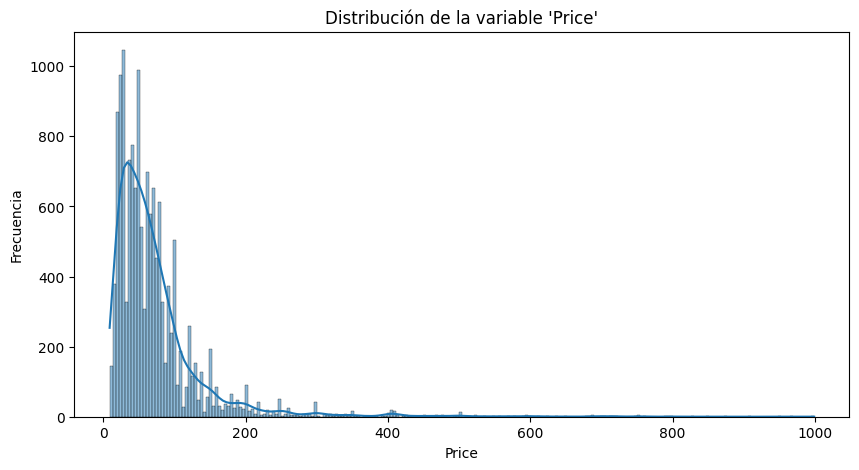

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribución de la variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.show()

### 2.4 Boxplots de variables numéricas

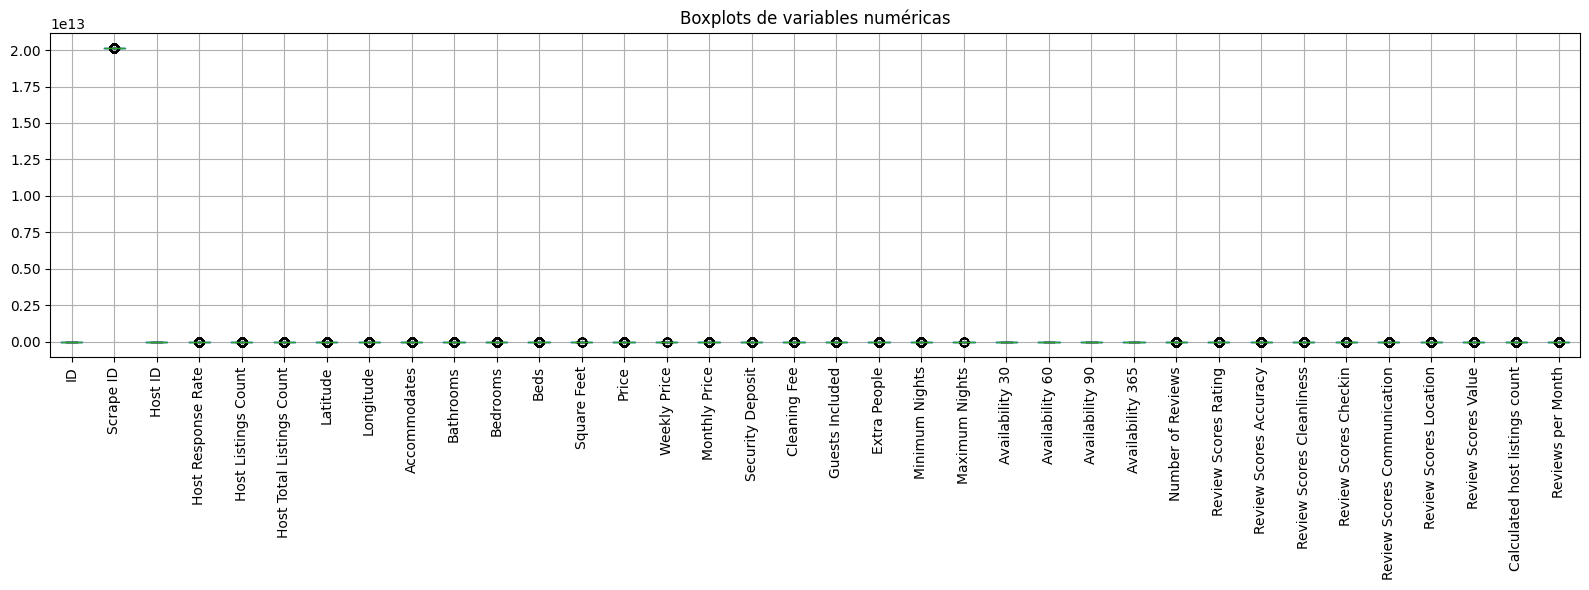

In [7]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(16,6))
df[num_cols].boxplot(rot=90)
plt.title("Boxplots de variables numéricas")
plt.tight_layout()
plt.show()

### 2.5 Matriz de correlación entre variables numéricas

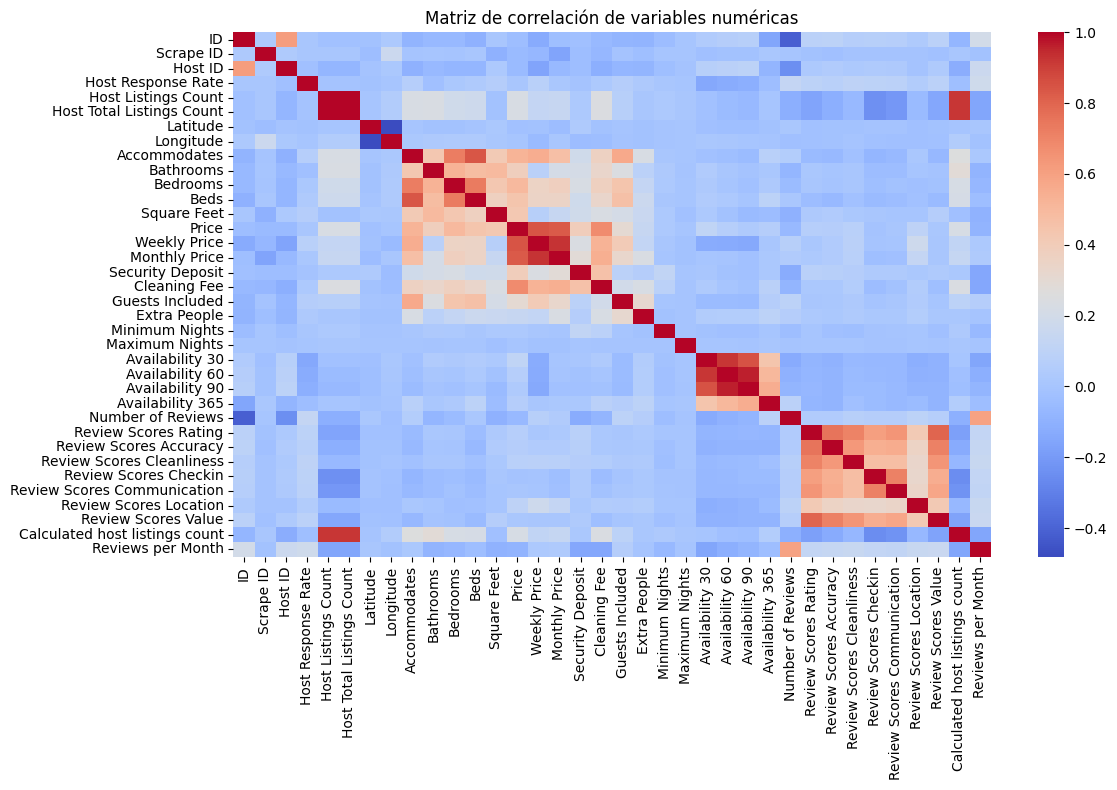

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

### 2.6 Relación entre 'price' y algunas variables numéricas

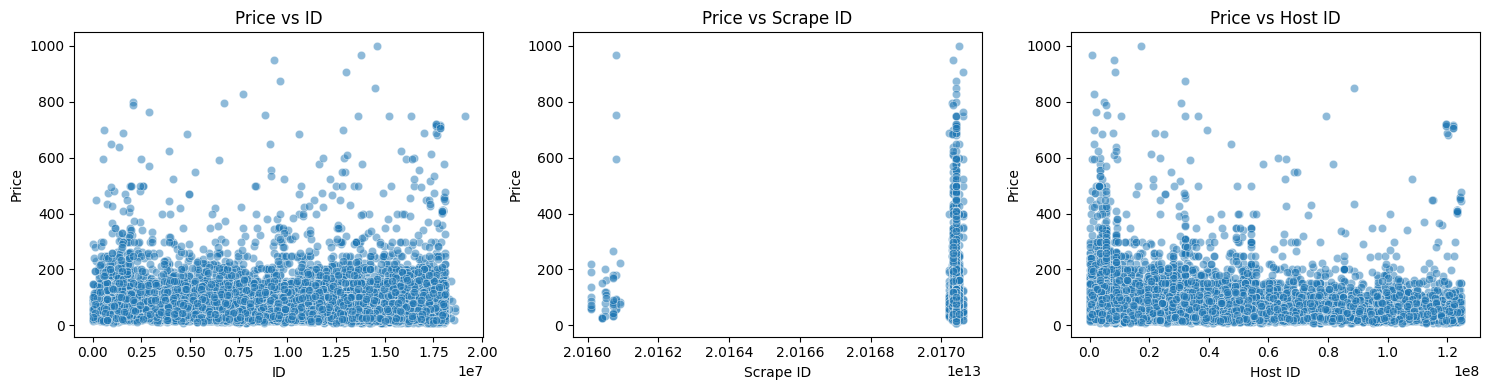

In [9]:
important_vars = num_cols[:3]

plt.figure(figsize=(15,4))
for i, col in enumerate(important_vars):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=col, y='Price', alpha=0.5)
    plt.title(f"Price vs {col}")
plt.tight_layout()
plt.show()

### 2.7 Detección de outliers mediante IQR

In [10]:
outliers_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers_counts[col] = ((df[col] < low) | (df[col] > high)).sum()

outliers_counts

{'ID': np.int64(0),
 'Scrape ID': np.int64(1445),
 'Host ID': np.int64(0),
 'Host Response Rate': np.int64(3211),
 'Host Listings Count': np.int64(2110),
 'Host Total Listings Count': np.int64(2110),
 'Latitude': np.int64(2279),
 'Longitude': np.int64(2240),
 'Accommodates': np.int64(659),
 'Bathrooms': np.int64(3637),
 'Bedrooms': np.int64(445),
 'Beds': np.int64(1888),
 'Square Feet': np.int64(23),
 'Price': np.int64(952),
 'Weekly Price': np.int64(26),
 'Monthly Price': np.int64(168),
 'Security Deposit': np.int64(428),
 'Cleaning Fee': np.int64(396),
 'Guests Included': np.int64(1122),
 'Extra People': np.int64(230),
 'Minimum Nights': np.int64(937),
 'Maximum Nights': np.int64(24),
 'Availability 30': np.int64(0),
 'Availability 60': np.int64(0),
 'Availability 90': np.int64(0),
 'Availability 365': np.int64(0),
 'Number of Reviews': np.int64(1492),
 'Review Scores Rating': np.int64(485),
 'Review Scores Accuracy': np.int64(361),
 'Review Scores Cleanliness': np.int64(492),
 'Revi

## 3. Preprocesamiento

### 3.1 Eliminación de outliers extremos en 'price'

In [11]:
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

low_price = Q1_price - 1.5 * IQR_price
high_price = Q3_price + 1.5 * IQR_price

df_clean = df[(df['Price'] >= low_price) & (df['Price'] <= high_price)].copy()
print("Tamaño después de eliminar outliers en Price:", df_clean.shape)

Tamaño después de eliminar outliers en Price: (13811, 89)


### 3.2 Eliminación de variables con alto porcentaje de missing

In [12]:
missing_percent_clean = df_clean.isnull().mean() * 100

threshold = 40.0
cols_to_drop_missing = missing_percent_clean[missing_percent_clean > threshold].index.tolist()

print("Columnas eliminadas por alto porcentaje de missing (> 40%):")
print(cols_to_drop_missing)

df_clean = df_clean.drop(columns=cols_to_drop_missing)
df_clean.shape

Columnas eliminadas por alto porcentaje de missing (> 40%):
['Notes', 'Access', 'Interaction', 'Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']


(13811, 77)

### 3.3 Imputación y codificación de variables categóricas

In [13]:
# Separar numéricas y categóricas
num_cols_clean = df_clean.select_dtypes(include=['int64','float64']).columns
cat_cols_clean = df_clean.select_dtypes(include=['object','category','bool']).columns

df_imputed = df_clean.copy()

# 1) Imputación de numéricas con la mediana
for col in num_cols_clean:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# 2) Imputación de categóricas con la moda
for col in cat_cols_clean:
    if df_imputed[col].isnull().any():
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

# 3) Eliminar columnas categóricas de ALTA cardinalidad
#    (demasiados valores distintos → demasiadas columnas con get_dummies)
nunique = df_imputed[cat_cols_clean].nunique()
high_card_cols = nunique[nunique > 50].index.tolist()  

print("Columnas categóricas de alta cardinalidad que vamos a eliminar:")
print(high_card_cols)

cat_cols_low = [c for c in cat_cols_clean if c not in high_card_cols]

df_reduced = df_imputed.drop(columns=high_card_cols)

# 4) One-hot encoding SOLO de las categóricas de baja cardinalidad
df_proc = pd.get_dummies(df_reduced, columns=cat_cols_low, drop_first=True)

print("Tamaño del dataset tras imputación + reducción + one-hot encoding:", df_proc.shape)


Columnas categóricas de alta cardinalidad que vamos a eliminar:
['Listing Url', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Transit', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Smart Location', 'Amenities', 'Calendar Updated', 'First Review', 'Last Review', 'Geolocation', 'Features']
Tamaño del dataset tras imputación + reducción + one-hot encoding: (13811, 253)


In [14]:
import numpy as np

# Por si hubiera infinitos, los pasamos a NaN
df_proc = df_proc.replace([np.inf, -np.inf], np.nan)

print("Total de valores NaN en df_proc antes de limpiar:",
      df_proc.isnull().sum().sum())


Total de valores NaN en df_proc antes de limpiar: 0


### 3.4 Selección de variables mediante Lasso

In [15]:
from sklearn.linear_model import LassoCV

y_model = df_proc['Price']      
X_model = df_proc.drop(columns=['Price'])

lasso = LassoCV(cv=5, random_state=42, n_jobs=1)  
lasso.fit(X_model, y_model)

important_features = X_model.columns[lasso.coef_ != 0]
print("Número de características seleccionadas por Lasso:", len(important_features))
important_features[:20]


Número de características seleccionadas por Lasso: 2


Index(['Scrape ID', 'Host ID'], dtype='object')

In [16]:
X_model_reduced = X_model[important_features]
X_model_reduced.shape

(13811, 2)

### 3.5 División train/test sobre los datos procesados

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_model_reduced, y_model, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape

((11048, 2), (2763, 2))

## 4. Modelado y evaluación

### 4.1 Definición de modelos

In [18]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

models

{'Ridge': Ridge(),
 'RandomForest': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
 'GradientBoosting': GradientBoostingRegressor(random_state=42)}

### 4.2 Validación cruzada (MAE)

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

for name, model in models.items():
    mae_scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    print(name, "- MAE CV medio:", -mae_scores.mean(), "+/-", mae_scores.std())

Ridge - MAE CV medio: 26.951238708676982 +/- 0.17208191364243305
RandomForest - MAE CV medio: 23.797187100839604 +/- 0.34845475959578365
GradientBoosting - MAE CV medio: 25.25444052978541 +/- 0.22062442355889383


### 4.3 Entrenamiento final y evaluación en test

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)  
    rmse = mse ** 0.5                         
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

results


{'Ridge': {'MAE': 26.726854575732997,
  'RMSE': 33.32718004885911,
  'R2': 0.012657998113595359},
 'RandomForest': {'MAE': 22.773485530560002,
  'RMSE': 31.43788490046289,
  'R2': 0.12142848978473542},
 'GradientBoosting': {'MAE': 25.197815188941433,
  'RMSE': 31.7104985802598,
  'R2': 0.10612535654306843}}

## 5. Conclusión

A partir de las métricas obtenidas en validación cruzada y en el conjunto de test, elegimos el modelo que presente menor MAE y RMSE, manteniendo un R² razonable. En muchos casos, los modelos de ensemble como Random Forest o Gradient Boosting capturan mejor las relaciones no lineales que un modelo lineal como Ridge.

No obstante, Ridge puede ser útil como modelo base rápido y más interpretable. La decisión final debe tener en cuenta el equilibrio entre rendimiento y complejidad del modelo.